# Inteligencia Artificial para Ciencia de Datos
### Trabajo nº 2

**Autores**
- Gabriel Chaves Benítez
- Francisco Horacio Sánchez Trigo

-------------------------------------------

In [419]:
import numpy as np
import pandas as pd
from os import getcwd, listdir, mkdir
from os.path import join, exists
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV, KFold, StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
import scipy.stats as stats
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, recall_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# 0 Conjunto de datos

**a) Pregunta de investigación:** ¿Cuáles son los principales factores relacionados con la diabetes?

La diabetes es una de las principales causas de enfermedad y muerte en todo el mundo. Aproximadamente ocho millones de estadounidenses tienen diabetes diagnosticada, y se estima que una cantidad similar padece diabetes sin diagnosticar. A nivel global, más de 460 millones de personas viven con diabetes, según datos de la Federación Internacional de Diabetes. Esta enfermedad crónica afecta la capacidad del cuerpo para regular los niveles de azúcar en la sangre, lo que puede llevar a complicaciones graves si no se controla adecuadamente.
Fuente: https://doi.org/10.1016/j.diabres.2017.03.024

La pregunta de investigación que se plantea es: ¿Cuáles son los principales factores relacionados con la diabetes? Para responder a esta pregunta se desarrolla a continuación un proyecto de ciencia de datos.

**b) Descripción del conjunto de datos:** El conjunto de datos utilizado en este trabajo proviene del National Health and Nutrition Examination Survey (NHANES) de los años 2013-2014. NHANES es un programa de análsis médicos y encuestas diseñado para evaluar el estado de salud y la nutrición de la población de los Estados Unidos. Los datos se recopilan a través de entrevistas y exámenes físicos y médicos realizados en unidades móviles que recorren el país. Estos datos se utilizan para estudiar una amplia variedad de temas relacionados con la salud y la nutrición. Más información sobre NHANES se puede encontrar en 
- https://www.cdc.gov/nchs/nhanes/index.htm.
- https://wwwn.cdc.gov/nchs/nhanes/continuousnhanes/default.aspx?BeginYear=2013

**c) Carga de datos y creación del dataframe**: NHANES organiza sus datos en varias categorías según los datos sean demográficos, dietéticos, examenes físicos, análisis de laboratorio o cuestionarios. A continuación se listan las categorías así como un enlace a la descripción de las características que contienen cada una de ellas:
- Demographics: https://wwwn.cdc.gov/nchs/nhanes/search/datapage.aspx?Component=Demographics&CycleBeginYear=2013
- Dietary: https://wwwn.cdc.gov/nchs/nhanes/search/datapage.aspx?Component=Dietary&CycleBeginYear=2013
- Examination: https://wwwn.cdc.gov/nchs/nhanes/search/datapage.aspx?Component=Examination&CycleBeginYear=2013
- Laboratory: https://wwwn.cdc.gov/nchs/nhanes/search/datapage.aspx?Component=Laboratory&CycleBeginYear=2013
- Questionnaire: https://wwwn.cdc.gov/nchs/nhanes/search/datapage.aspx?Component=Questionnaire&CycleBeginYear=2013

Hemos descargados los archivos en la carpeta 'Datos' organizados en subcarpetas, según las categorías definidas por NHANES: Demographics, Dietary, Examination, Laboratory, Questionnaire.

In [420]:
directorio_datos = join(getcwd(), "Datos")

for carpeta in listdir(directorio_datos):
    print(carpeta)
    print(listdir(join(directorio_datos, carpeta)))

Demographics
['demo_h.xpt']
Dietary
['dr1iff_h.xpt', 'dr1tot_h.xpt', 'dr2iff_h.xpt', 'dr2tot_h.xpt', 'drxfcd_h.xpt', 'ds1ids_h.xpt', 'ds1tot_h.xpt', 'ds2ids_h.xpt', 'ds2tot_h.xpt', 'dsbi.xpt', 'dsii.xpt', 'dspi.xpt', 'dsqids_h.xpt', 'dsqtot_h.xpt']
Examination
['bmx_h.xpt', 'bpx_h.xpt', 'csx_h.xpt', 'dxxaac_h.xpt', 'dxxag_h.xpt', 'dxxfem_h.xpt', 'dxxfrx_h.xpt', 'dxxl1_h.xpt', 'dxxl2_h.xpt', 'dxxl3_h.xpt', 'dxxl4_h.xpt', 'dxxspn_h.xpt', 'dxxt10_h.xpt', 'dxxt11_h.xpt', 'dxxt12_h.xpt', 'dxxt4_h.xpt', 'dxxt5_h.xpt', 'dxxt6_h.xpt', 'dxxt7_h.xpt', 'dxxt8_h.xpt', 'dxxt9_h.xpt', 'dxxvfa_h.xpt', 'dxx_h.xpt', 'flxcln_h.xpt', 'mgx_h.xpt', 'ohxden_h.xpt', 'ohxper_h.xpt', 'ohxref_h.xpt']
Laboratory
['aas_h.xpt', 'aa_h.xpt', 'alb_cr_h.xpt', 'alds_h.xpt', 'ald_h.xpt', 'amdgds_h.xpt', 'amdgyd_h.xpt', 'apob_h.xpt', 'bfrpol_h.xpt', 'biopro_h.xpt', 'cafe_h.xpt', 'cbc_h.xpt', 'chlmda_h.xpt', 'cot_h.xpt', 'cusezn_h.xpt', 'deet_h.xpt', 'ephpp_h.xpt', 'ethoxs_h.xpt', 'ethox_h.xpt', 'fastqx_h.xpt', 'fas_h.xpt

Los datos se encuentran en formato XPT (SAS Transport). A continuación cada archivo XPT se carga en un dataframe. Luego, cada dataframe se agrega a una lista.

In [421]:
def crear_lista_dataframes(directorio_datos):
    lista_dataframes = []

    # Iterar sobre cada carpeta dentro del directorio 'Datos'
    for carpeta in listdir(directorio_datos):    
        # Iterar sobre cada archivo .xpt en la carpeta actual
        for archivo_xpt in listdir(join(directorio_datos, carpeta)):
            # Leer el archivo .xpt como un dataframe de pandas
            df = pd.read_sas(join(directorio_datos, carpeta, archivo_xpt))
            
            # Añado a cada columna un prefijo basado en el nombre del archivo xpt (así identifico de qué archivo proviene cada característica)
            prefijo = archivo_xpt.split('.')[0] + '_'
            
            # Renombrar las columnas excepto 'SEQN' con el prefijo del nombre del archivo xpt
            nuevas_columnas = {col: prefijo + col if col != 'SEQN' else col for col in df.columns}
            df.rename(columns=nuevas_columnas, inplace=True)
            
            # Cada participante de la base de datos de NHANES tiene un identificador único llamado SEQN. 
            # Verificar si la columna 'SEQN' existe en el dataframe
            if 'SEQN' in df.columns:
                # Verificar duplicados en 'SEQN'. hay algunos archivos donde cada participante tiene asignado más de una fila, por la naturaleza de los datos que recogen (por ejemplo, varias medidas a lo largo del tiempo). Hemos decidido precindir de esas categorías por simplicidad.
                if not df['SEQN'].duplicated().any():
                    # Agregar el dataframe a la lista de dataframes
                    lista_dataframes.append(df)
                else:
                    # Mostrar mensaje si hay duplicados en 'SEQN'
                    print(f"Existen valores duplicados en SEQN en el dataframe: {archivo_xpt}")
            else:
                # Mostrar mensaje si no existe 'SEQN' en el dataframe. Algunos de los archivos XPT contienen información adicional sobre los datos y no tienen columna SEQN, por lo que no son necesarios. 
                print(f"El dataframe del archivo {archivo_xpt} no tiene una columna 'SEQN'.")

    return lista_dataframes

In [422]:
lista_dataframes = crear_lista_dataframes(directorio_datos)

Existen valores duplicados en SEQN en el dataframe: dr1iff_h.xpt
Existen valores duplicados en SEQN en el dataframe: dr2iff_h.xpt
El dataframe del archivo drxfcd_h.xpt no tiene una columna 'SEQN'.
Existen valores duplicados en SEQN en el dataframe: ds1ids_h.xpt
Existen valores duplicados en SEQN en el dataframe: ds2ids_h.xpt
El dataframe del archivo dsbi.xpt no tiene una columna 'SEQN'.
El dataframe del archivo dsii.xpt no tiene una columna 'SEQN'.
El dataframe del archivo dspi.xpt no tiene una columna 'SEQN'.
Existen valores duplicados en SEQN en el dataframe: dsqids_h.xpt
El dataframe del archivo bfrpol_h.xpt no tiene una columna 'SEQN'.
El dataframe del archivo pcbpol_h.xpt no tiene una columna 'SEQN'.
El dataframe del archivo pstpol_h.xpt no tiene una columna 'SEQN'.
Existen valores duplicados en SEQN en el dataframe: rxq_rx_h.xpt


In [423]:
len(lista_dataframes)

168

Combinamos los dataframes en uno solo, utilizando la columna 'SEQN' como clave de unión.

In [424]:
# Comienzo con el primer dataframe de la lista
df_completo = lista_dataframes[0]

# Iterar sobre el resto y unirlos en base a SEQN, que es el identificador único de cada persona
for df in lista_dataframes[1:]:
    df_completo = df_completo.merge(df, on='SEQN', how='outer')

In [425]:
df_completo.shape

(10175, 6537)

Nuestra base de datos consta de 10175 participantes y 6537 características. Como veremos luego, no todos los participantes tienen información en todas las características. Y desde luego no todas las características son relevantes para nuestro análisis.

In [426]:
df_completo.head()

,SEQN,demo_h_SDDSRVYR,demo_h_RIDSTATR,demo_h_RIAGENDR,demo_h_RIDAGEYR,demo_h_RIDAGEMN,demo_h_RIDRETH1,demo_h_RIDRETH3,demo_h_RIDEXMON,demo_h_RIDEXAGM,...,whq_h_WHD080R,whq_h_WHD080S,whq_h_WHD080T,whq_h_WHD080U,whq_h_WHD080L,whq_h_WHD110,whq_h_WHD120,whq_h_WHD130,whq_h_WHD140,whq_h_WHQ150
0,73557.0,8.0,2.0,1.0,69.0,NaN,4.0,4.0,1.0,NaN,...,NaN,NaN,NaN,NaN,40.0,270.0,200.0,69.0,270.0,62.0
1,73558.0,8.0,2.0,1.0,54.0,NaN,3.0,3.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,240.0,250.0,72.0,250.0,25.0
2,73559.0,8.0,2.0,1.0,72.0,NaN,3.0,3.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,180.0,190.0,70.0,228.0,35.0
3,73560.0,8.0,2.0,1.0,9.0,NaN,3.0,3.0,1.0,119.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,73561.0,8.0,2.0,2.0,73.0,NaN,3.0,3.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,150.0,135.0,67.0,170.0,60.0


**d) Preselección de variables**: Si bien posteriormente se aplicarán técnicas de selección de variables, en esta etapa se realiza una preselección de características que se consideran relevantes para el estudio de la diabetes. Tal y como acabamos de ver, la base de datos de NHANES que acabamos de cargar contiene muchas variables para cada participante, por lo que consideramos necesario realizar una preselección de las mismas.
Para esta preselección hemos consultado la literatura científica y seleccionado las variables que se consideran más relevantes para el estudio de la diabetes. Por tanto, se podría decir que esta preselección se basada en el conocimiento experto (fuente: https://www.mdpi.com/1660-4601/19/22/15027).

Se preseleccionan las siguientes variables: 

| Categoría de datos    | Nombre de la característica | Descripción                                     |
|-----------------------|-----------------------------|-------------------------------------------------|
| *Demográficos*        |                             |                                                 |
|                       | RIAGENDR                    | Género                                          |
|                       | RIDAGEYR                    | Edad en años                                    |
|                       | RIDRETH3                    | Origen étnico                                   |
|                       | DMDEDUC2                    | Nivel educativo                                 |
|                       | DMDMARTL                    | Estado civil                                    |
|                       | RIDEXPRG                    | Estado de embarazo al momento del examen        |
|                       | INDFMPIR                    | Relación de ingresos familiares                 |
| *Dietéticos*          |                             |                                                 |
|                       | DR1TKCAL / DR2TKCAL         | Energía (kcal) (día 1/ día 2)                   |
|                       | DR1TPROT / DR2TPROT         | Proteína (g) (día 1/ día 2)                     |
|                       | DR1TCARB / DR2TCARB         | Carbohidratos (g) (día 1/ día 2)                |
|                       | DR1TSUGR / DR2TSUGR         | Azúcares totales (g) (día 1/ día 2)             |
|                       | DR1TFIBE / DR2TFIBE         | Fibra dietética (g) (día 1/ día 2)              |
|                       | DR1TTFAT / DR2TTFAT         | Grasas totales (g) (día 1/ día 2)               |
|                       | DR1TCHOL / DR2TCHOL         | Colesterol (mg) (día 1/ día 2)                  |
| *Examen*              |                             |                                                 |
|                       | BMXBMI                      | Índice de Masa Corporal (IMC)                   |
|                       | BPXSYi                      | Presión Arterial Sistólica. (4 medidas: i=1-4)  |
|                       | BPXDIi                      | Presión Arterial Diastólica. (4 medidas: i=1-4) |
| *Cuestionario*        |                             |                                                 |
|                       | ALQ130                      | Alcohol (bebidas/día)                           |
|                       | PAD680                      | Minutos de actividad sedentaria                 |
|                       | SMQ681                      | Fumador (sí/no)                                 |
|                       | SLD010H                     | Horas de sueño                                  |
| *Laboratorio*         |                             |                                                 |
| (Objetivo de análisis)| LBDGLUSI                    | Glucosa en ayunas (mmol/L)                      |

In [427]:
df_preseleccion = df_completo[['SEQN','demo_h_RIAGENDR','demo_h_RIDAGEYR','demo_h_RIDRETH3','demo_h_DMDEDUC2','demo_h_DMDMARTL','demo_h_RIDEXPRG','demo_h_INDFMPIR','dr1tot_h_DR1TKCAL','dr2tot_h_DR2TKCAL','dr1tot_h_DR1TPROT','dr2tot_h_DR2TPROT','dr1tot_h_DR1TCARB','dr2tot_h_DR2TCARB','dr1tot_h_DR1TSUGR','dr2tot_h_DR2TSUGR','dr1tot_h_DR1TFIBE','dr2tot_h_DR2TFIBE','dr1tot_h_DR1TTFAT','dr2tot_h_DR2TTFAT','dr1tot_h_DR1TCHOL','dr2tot_h_DR2TCHOL', 'bmx_h_BMXBMI', 'bpx_h_BPXSY1','bpx_h_BPXSY2','bpx_h_BPXSY3','bpx_h_BPXSY4','bpx_h_BPXDI1','bpx_h_BPXDI2','bpx_h_BPXDI3','bpx_h_BPXDI4', 'alq_h_ALQ130','paq_h_PAD680', 'smqrtu_h_SMQ681','slq_h_SLD010H','glu_h_LBDGLUSI']].copy() # Hago copy para evitar warning

In [428]:
df_preseleccion.head()

,SEQN,demo_h_RIAGENDR,demo_h_RIDAGEYR,demo_h_RIDRETH3,demo_h_DMDEDUC2,demo_h_DMDMARTL,demo_h_RIDEXPRG,demo_h_INDFMPIR,dr1tot_h_DR1TKCAL,dr2tot_h_DR2TKCAL,...,bpx_h_BPXSY4,bpx_h_BPXDI1,bpx_h_BPXDI2,bpx_h_BPXDI3,bpx_h_BPXDI4,alq_h_ALQ130,paq_h_PAD680,smqrtu_h_SMQ681,slq_h_SLD010H,glu_h_LBDGLUSI
0,73557.0,1.0,69.0,4.0,3.0,4.0,NaN,0.84,1574.0,2257.0,...,NaN,72.0,76.0,74.0,NaN,1.0,600.0,1.0,7.0,NaN
1,73558.0,1.0,54.0,3.0,3.0,1.0,NaN,1.78,5062.0,1684.0,...,NaN,62.0,80.0,42.0,NaN,4.0,540.0,1.0,9.0,NaN
2,73559.0,1.0,72.0,3.0,4.0,1.0,NaN,4.51,1743.0,1947.0,...,NaN,90.0,76.0,80.0,NaN,NaN,300.0,2.0,8.0,10.713
3,73560.0,1.0,9.0,3.0,NaN,NaN,NaN,2.52,1490.0,1578.0,...,NaN,38.0,34.0,38.0,NaN,NaN,NaN,NaN,NaN,NaN
4,73561.0,2.0,73.0,3.0,5.0,1.0,NaN,5.00,1421.0,1592.0,...,NaN,86.0,88.0,86.0,NaN,NaN,480.0,2.0,9.0,5.940


Voy a renombrar las variables para que sean más descriptivas.

In [429]:
# Renombrar las columnas
df_preseleccion.rename(columns={
    'SEQN': 'ID',
    'demo_h_RIAGENDR': 'Genero',
    'demo_h_RIDAGEYR': 'Edad',
    'demo_h_RIDRETH3': 'Etnia',
    'demo_h_DMDEDUC2': 'Educacion',
    'demo_h_DMDMARTL': 'Estado_civil',
    'demo_h_RIDEXPRG': 'Embarazo',
    'demo_h_INDFMPIR': 'Ingreso_familiar',
    'dr1tot_h_DR1TKCAL': 'Calorias_dia1',
    'dr2tot_h_DR2TKCAL': 'Calorias_dia2',
    'dr1tot_h_DR1TPROT': 'Proteina_dia1',
    'dr2tot_h_DR2TPROT': 'Proteina_dia2',
    'dr1tot_h_DR1TCARB': 'Carbohidratos_dia1',
    'dr2tot_h_DR2TCARB': 'Carbohidratos_dia2',
    'dr1tot_h_DR1TSUGR': 'Azucar_dia1',
    'dr2tot_h_DR2TSUGR': 'Azucar_dia2',
    'dr1tot_h_DR1TFIBE': 'Fibra_dia1',
    'dr2tot_h_DR2TFIBE': 'Fibra_dia2',
    'dr1tot_h_DR1TTFAT': 'Grasa_total_dia1',
    'dr2tot_h_DR2TTFAT': 'Grasa_total_dia2',
    'dr1tot_h_DR1TCHOL': 'Colesterol_dia1',
    'dr2tot_h_DR2TCHOL': 'Colesterol_dia2',
    'bmx_h_BMXBMI': 'IMC',
    'bpx_h_BPXSY1': 'Presion_sistolica1',
    'bpx_h_BPXSY2': 'Presion_sistolica2',
    'bpx_h_BPXSY3': 'Presion_sistolica3',
    'bpx_h_BPXSY4': 'Presion_sistolica4',
    'bpx_h_BPXDI1': 'Presion_diastolica1',
    'bpx_h_BPXDI2': 'Presion_diastolica2',
    'bpx_h_BPXDI3': 'Presion_diastolica3',
    'bpx_h_BPXDI4': 'Presion_diastolica4',
    'alq_h_ALQ130': 'Alcohol',
    'paq_h_PAD680': 'Sedentarismo',
    'smqrtu_h_SMQ681': 'Tabaco',
    'slq_h_SLD010H': 'Horas_sueno',
    'glu_h_LBDGLUSI': 'Glucosa'
}, inplace=True)

In [430]:
df_preseleccion.head()

,ID,Genero,Edad,Etnia,Educacion,Estado_civil,Embarazo,Ingreso_familiar,Calorias_dia1,Calorias_dia2,...,Presion_sistolica4,Presion_diastolica1,Presion_diastolica2,Presion_diastolica3,Presion_diastolica4,Alcohol,Sedentarismo,Tabaco,Horas_sueno,Glucosa
0,73557.0,1.0,69.0,4.0,3.0,4.0,NaN,0.84,1574.0,2257.0,...,NaN,72.0,76.0,74.0,NaN,1.0,600.0,1.0,7.0,NaN
1,73558.0,1.0,54.0,3.0,3.0,1.0,NaN,1.78,5062.0,1684.0,...,NaN,62.0,80.0,42.0,NaN,4.0,540.0,1.0,9.0,NaN
2,73559.0,1.0,72.0,3.0,4.0,1.0,NaN,4.51,1743.0,1947.0,...,NaN,90.0,76.0,80.0,NaN,NaN,300.0,2.0,8.0,10.713
3,73560.0,1.0,9.0,3.0,NaN,NaN,NaN,2.52,1490.0,1578.0,...,NaN,38.0,34.0,38.0,NaN,NaN,NaN,NaN,NaN,NaN
4,73561.0,2.0,73.0,3.0,5.0,1.0,NaN,5.00,1421.0,1592.0,...,NaN,86.0,88.0,86.0,NaN,NaN,480.0,2.0,9.0,5.940


# 1 Exploración y visualización mediante gráficos

Se incluyen a continuación varias gráficas que nos permiten explorar la relación entre las características seleccionadas.

**a) Densidad de probabilidad de la variable objetivo (glucosa)**

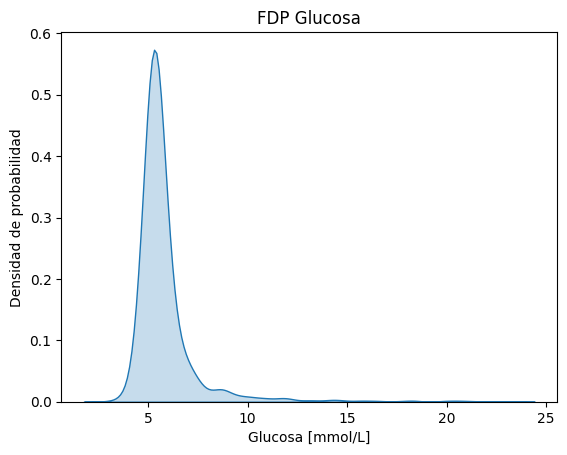

In [431]:
sns.kdeplot(data=df_preseleccion, x='Glucosa', fill=True)

plt.title('FDP Glucosa')
plt.xlabel('Glucosa [mmol/L]')
plt.ylabel('Densidad de probabilidad')
plt.show()

**b) Scatter plot de Glucosa vs. Índice de Masa Corporal (IMC)**

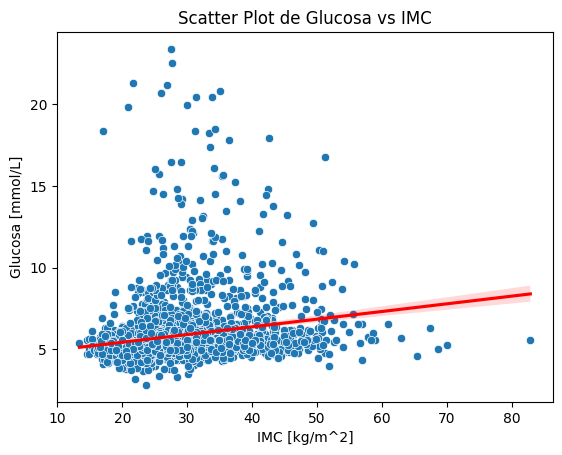

In [432]:
sns.scatterplot(data=df_preseleccion, x='IMC', y='Glucosa')
sns.regplot(data=df_preseleccion, x='IMC', y='Glucosa', scatter=False, color='red') # Añadir línea de tendencia (regresión lineal)

plt.title('Scatter Plot de Glucosa vs IMC')
plt.xlabel('IMC [kg/m^2]')
plt.ylabel('Glucosa [mmol/L]')
plt.show()

**c) Matriz de correlación de datos dietéticos**

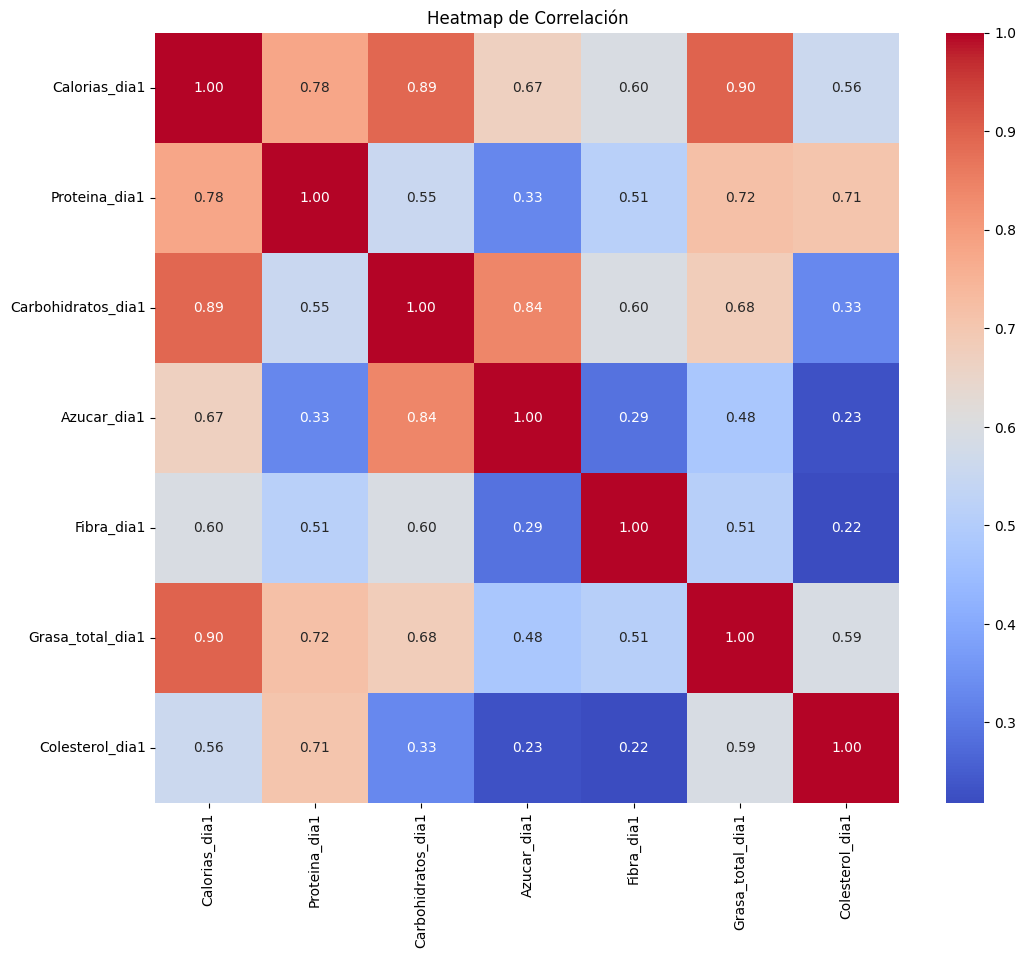

In [433]:
# Calcular la matriz de correlación
correlation_matrix = df_preseleccion[['Calorias_dia1','Proteina_dia1','Carbohidratos_dia1','Azucar_dia1','Fibra_dia1','Grasa_total_dia1','Colesterol_dia1']].corr()

# Crear el heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

plt.title('Heatmap de Correlación')
plt.show()

**d) Pairplot de varias características diferenciando por género**

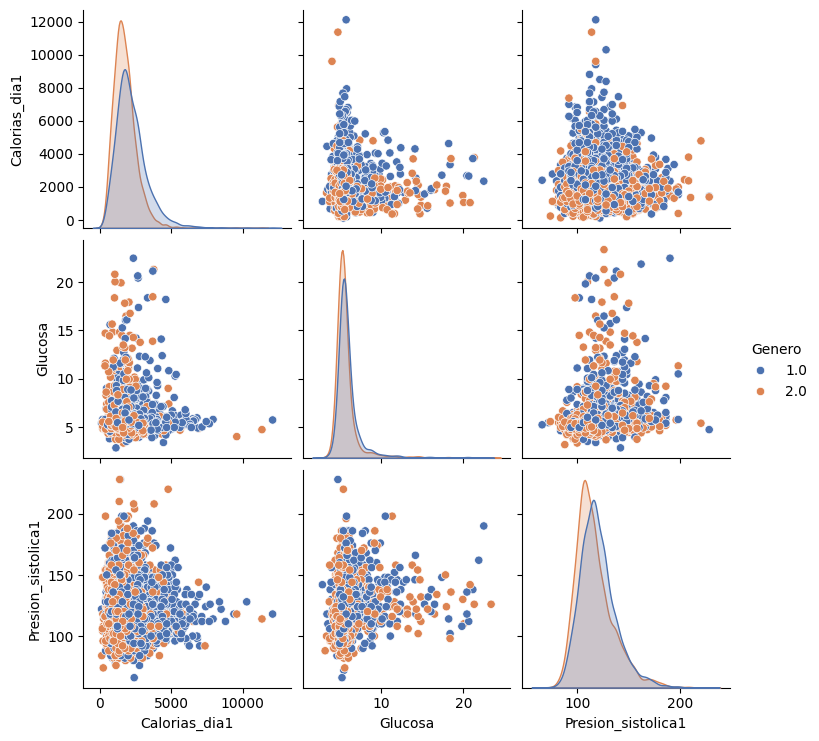

In [434]:
# Seleccionar un subconjunto de las variables para el pair plot
variables_seleccionadas = ['Calorias_dia1', 'Glucosa', 'Presion_sistolica1','Genero']

# Crear el pair plot
sns.pairplot(df_preseleccion[variables_seleccionadas],hue='Genero',palette= 'deep')

plt.show()


**e) Jointplot de IMC vs. calorías ingeridas, distinguiendo según género**

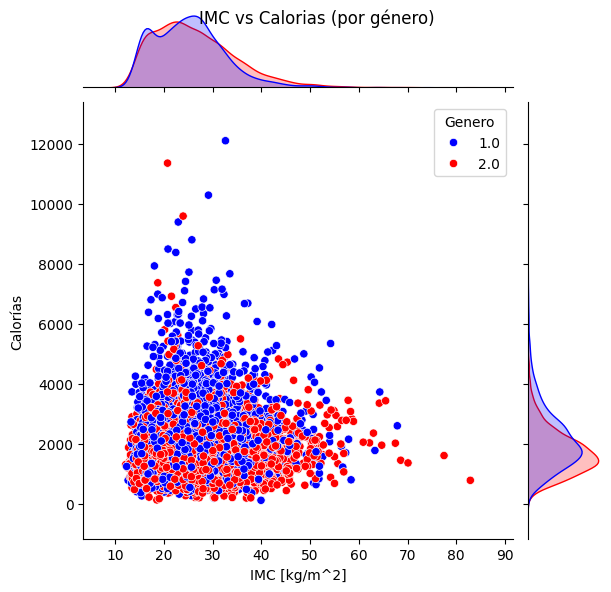

In [435]:
# Crear el joint plot
sns.jointplot(data=df_preseleccion, x='IMC', y='Calorias_dia1', kind='scatter', hue='Genero', palette={1: "blue", 2: "red"})

plt.suptitle('IMC vs Calorias (por género)')
plt.xlabel('IMC [kg/m^2]')
plt.ylabel('Calorías')
plt.show()

#### f) Boxplot para detectar outliers visualmente

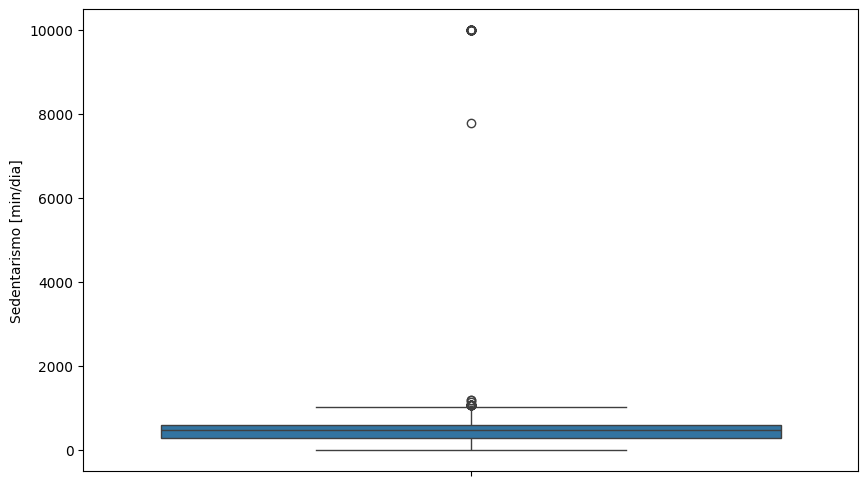

In [436]:
# Crear el boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_preseleccion, y='Sedentarismo')

plt.ylabel('Sedentarismo [min/dia]')
plt.show()

Hay valores erróneos. El máximo de minutos posibles en un día es 1440. Se limpiarán posteriormente.

# 2 Limpieza y preprocesado de los datos

**a) Bug de pd.read_sas**: Se ha detectado un bug en la función pd.read_sas que impide leer correctamente los ceros. En lugar de leer 0, lee 5.397605346934028e-79. Se ha reportado en: https://github.com/pandas-dev/pandas/issues/50670
Se soluciona simplemente reemplazando los valores erróneos por 0.

In [437]:
print((df_preseleccion == 0).sum().sum())

0


In [438]:
print((df_preseleccion == 5.397605346934028e-79).sum().sum())

1315


In [439]:
df_preseleccion=df_preseleccion.replace(5.397605346934028e-79,0)

In [440]:
print((df_preseleccion == 0).sum().sum())

1315


**b) Identificando valores faltantes**: Hay distintos motivos que hacen que falten valores en la base de datos de NHANES. Por ejemplo, una variable puede no ser relevante para un participante, o un participante puede elegir no responder a algunas cuestiones, o rechazar someterse a ciertos exámenes. NHANES utiliza distintos códigos para identificar estas situaciones: cuando el participante rechaza se rellena el campo con 7 (es decir, 7, 77, 777, ..., dependiendo del número de dígitos requeridos para un valor de datos en particular), no sabe (relleno con 9), y valores faltantes (un campo en blanco) que significa que a la persona no se le hizo la pregunta o no se le realizó la prueba. El número de veces que se repiten los 7 o los 9 dependerá del número de dígitos requeridos para que no se confundan con valores reales. Me explico con unos ejemplos:
- Cuando el número de valores únicos es menor que 7, entonces los valores faltantes se codifican con 7 y 9. Por ejemplo, la variable SXQ803.
- Cuando el número de valores únicos es mayor que 7 pero menor que 77, entonces los valores faltantes se codifican con 77 y 99. Por ejemplo, la variable SXD031.
- Cuando el número de valores únicos es mayor que 77 pero menor que 777, entonces los valores faltantes se codifican con 777 y 999. Por ejemplo, la variable ALQ141Q.
Y así sucesivamente.

Fuente: https://wwwn.cdc.gov/nchs/nhanes/continuousnhanes/faq.aspx#Q15

En nuestro caso sustituiremos todos estos valores por NaN, independientemente de la causa de la falta de datos.

In [441]:
# Esta función se encarga de determinar los códigos de valores faltantes apropiados basados en el conteo de valores únicos de una característica.
def get_missing_codes(count):
    if count < 7:
        return [7, 9, 77, 99, 777, 999,7777, 9999, 77777, 99999, 777777, 999999]
    elif count < 77:
        return [77, 99, 777, 999,7777, 9999, 77777, 99999, 777777, 999999]
    elif count < 777:
        return [777, 999,7777, 9999, 77777, 99999, 777777, 999999]
    # Se puede seguir añadiendo más casos según sea necesario   
    else:
        return []

In [442]:
# Iterar sobre las columnas y reemplazar los códigos de valores faltantes apropiados
for col in df_preseleccion.columns:
    unique_count = df_preseleccion[col].nunique()
    missing_codes = get_missing_codes(unique_count)
    
    df_preseleccion[col].replace(missing_codes, np.nan, inplace=True)

**c) Imputación de valores faltantes**

In [443]:
df_preseleccion.isna().sum()

ID                        0
Genero                    0
Edad                      0
Etnia                   470
Educacion              4406
Estado_civil           4409
Embarazo               8866
Ingreso_familiar        785
Calorias_dia1          1644
Calorias_dia2          2722
Proteina_dia1          1644
Proteina_dia2          2722
Carbohidratos_dia1     1644
Carbohidratos_dia2     2722
Azucar_dia1            1644
Azucar_dia2            2722
Fibra_dia1             1644
Fibra_dia2             2722
Grasa_total_dia1       1644
Grasa_total_dia2       2722
Colesterol_dia1        1644
Colesterol_dia2        2722
IMC                    1120
Presion_sistolica1     3003
Presion_sistolica2     2766
Presion_sistolica3     2767
Presion_sistolica4     9660
Presion_diastolica1    3003
Presion_diastolica2    2766
Presion_diastolica3    2767
Presion_diastolica4    9660
Alcohol                6582
Sedentarismo           3066
Tabaco                 3746
Horas_sueno            3721
Glucosa             

Prescindiré de aquellas instancias para las que no hay medida de glucosa, ya que es la variable objetivo.

In [444]:
df_preseleccion.dropna(subset=['Glucosa'],inplace=True)
df_preseleccion.isna().sum()

ID                        0
Genero                    0
Edad                      0
Etnia                    89
Educacion               598
Estado_civil            599
Embarazo               2599
Ingreso_familiar        228
Calorias_dia1           263
Calorias_dia2           596
Proteina_dia1           263
Proteina_dia2           596
Carbohidratos_dia1      263
Carbohidratos_dia2      596
Azucar_dia1             263
Azucar_dia2             596
Fibra_dia1              263
Fibra_dia2              596
Grasa_total_dia1        263
Grasa_total_dia2        596
Colesterol_dia1         263
Colesterol_dia2         596
IMC                      32
Presion_sistolica1      244
Presion_sistolica2      152
Presion_sistolica3      140
Presion_sistolica4     2988
Presion_diastolica1     244
Presion_diastolica2     152
Presion_diastolica3     140
Presion_diastolica4    2988
Alcohol                1515
Sedentarismo             29
Tabaco                  242
Horas_sueno             309
Glucosa             

Hay muchos valores faltantes en embarazo. Estos se imputarán como 'No' (código 2).

In [445]:
df_preseleccion['Embarazo'].fillna(2, inplace=True)

Imputaré los valores faltantes del resto de características. En caso de variables categóricas, se imputarán con la moda. En caso de variables continuas, se imputarán con la media.

In [446]:
df_preseleccion.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3172 entries, 2 to 10170
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   3172 non-null   float64
 1   Genero               3172 non-null   float64
 2   Edad                 3172 non-null   float64
 3   Etnia                3083 non-null   float64
 4   Educacion            2574 non-null   float64
 5   Estado_civil         2573 non-null   float64
 6   Embarazo             3172 non-null   float64
 7   Ingreso_familiar     2944 non-null   float64
 8   Calorias_dia1        2909 non-null   float64
 9   Calorias_dia2        2576 non-null   float64
 10  Proteina_dia1        2909 non-null   float64
 11  Proteina_dia2        2576 non-null   float64
 12  Carbohidratos_dia1   2909 non-null   float64
 13  Carbohidratos_dia2   2576 non-null   float64
 14  Azucar_dia1          2909 non-null   float64
 15  Azucar_dia2          2576 non-null   float

In [447]:
# Identificar columnas numéricas y categóricas
atrib_numericos = [
    'Edad', 'Ingreso_familiar', 'IMC', 'Horas_sueno','Sedentarismo'
] 

atrib_categoricos = [
    'Genero', 'Etnia', 'Educacion', 
    'Estado_civil', 'Embarazo', 'Alcohol','Tabaco'
]

In [448]:
# Crear imputadores
imputer_num = SimpleImputer(strategy='mean')
imputer_cat = SimpleImputer(strategy='most_frequent')

# Aplicar imputación a las columnas numéricas
df_preseleccion[atrib_numericos] = imputer_num.fit_transform(df_preseleccion[atrib_numericos])

# Aplicar imputación a las columnas categóricas
df_preseleccion[atrib_categoricos] = imputer_cat.fit_transform(df_preseleccion[atrib_categoricos])

In [449]:
df_preseleccion.isna().sum()

ID                        0
Genero                    0
Edad                      0
Etnia                     0
Educacion                 0
Estado_civil              0
Embarazo                  0
Ingreso_familiar          0
Calorias_dia1           263
Calorias_dia2           596
Proteina_dia1           263
Proteina_dia2           596
Carbohidratos_dia1      263
Carbohidratos_dia2      596
Azucar_dia1             263
Azucar_dia2             596
Fibra_dia1              263
Fibra_dia2              596
Grasa_total_dia1        263
Grasa_total_dia2        596
Colesterol_dia1         263
Colesterol_dia2         596
IMC                       0
Presion_sistolica1      244
Presion_sistolica2      152
Presion_sistolica3      140
Presion_sistolica4     2988
Presion_diastolica1     244
Presion_diastolica2     152
Presion_diastolica3     140
Presion_diastolica4    2988
Alcohol                   0
Sedentarismo              0
Tabaco                    0
Horas_sueno               0
Glucosa             

No vamos a imputar todavía valores faltantes en las variables de dieta y presión arterial, ya que al traterse de variables para las que se cuenta con medidas repetidas, se procesarán previamente en el apartado de ingeniería de características.

**d) Outliers**: En la exploración visual se detectaron outliers. Vamos a escribir una función para encontrar outliers, aunque de momento no eliminaremos ninguno. Se podría probar si imputar los outliers con la media o la mediana mejora el rendimiento del modelo.

In [450]:
def encuentra_outliers(df, column):
    # Calcular cuartiles y rango intercuartilico (IQR)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Definir límits inferior y superior
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Print outliers
    num_outliers = len(df) - len(df[(df[column] >= lower_bound) & (df[column] <= upper_bound)])
    print(f"{num_outliers} outliers en {column}")



In [451]:
for column in atrib_numericos:
    encuentra_outliers(df_preseleccion, column)

0 outliers en Edad
0 outliers en Ingreso_familiar
118 outliers en IMC
34 outliers en Horas_sueno
31 outliers en Sedentarismo


# 3 Ingeniería de características y reducción de la dimensionalidad
**a) Ingeniería de características**

Las variables dietéticas se midieron dos veces. Se calculará la media de ambas mediciones y se eliminarán las variables originales.

In [452]:
# Lista de variables a procesar
variables = ['Calorias', 'Proteina', 'Carbohidratos', 'Azucar', 'Fibra', 'Grasa_total', 'Colesterol']

# Calcular la media de los dos días y crear nuevas columnas
for var in variables:
    dia1 = f'{var}_dia1'
    dia2 = f'{var}_dia2'
    df_preseleccion[var] = df_preseleccion[[dia1, dia2]].mean(axis=1)

# Eliminar las columnas originales de los dos días
df_preseleccion.drop(columns=[f'{var}_dia1' for var in variables] + [f'{var}_dia2' for var in variables],inplace=True)


La presión arterial se midió cuatro veces. Se calculará la media de las cuatro mediciones y se eliminarán las variables originales.

In [453]:
# Lista de variables a procesar
variables = ['Presion_sistolica', 'Presion_diastolica']

# Calcular la media de las medidas y crear nuevas columnas
for var in variables:
    medidas = [f'{var}{i}' for i in range(1, 5)]
    df_preseleccion[var] = df_preseleccion[medidas].mean(axis=1)

# Eliminar las columnas originales de las medidas
df_preseleccion.drop(columns=[f'{var}{i}' for var in variables for i in range(1, 5)], inplace=True)


En estas variables no habíamos eliminado los valores faltantes, a la espera de hacer estas medias. Los valores faltantes que queden se imputarán ahora.

In [454]:
atrib_numericos = [
    'Calorias', 'Proteina', 'Carbohidratos', 'Azucar', 'Fibra', 'Grasa_total', 'Colesterol', 'Presion_sistolica', 'Presion_diastolica'
]

# Aplicar imputación a las columnas numéricas
df_preseleccion[atrib_numericos] = imputer_num.fit_transform(df_preseleccion[atrib_numericos])

In [455]:
df_preseleccion.isna().sum()

ID                    0
Genero                0
Edad                  0
Etnia                 0
Educacion             0
Estado_civil          0
Embarazo              0
Ingreso_familiar      0
IMC                   0
Alcohol               0
Sedentarismo          0
Tabaco                0
Horas_sueno           0
Glucosa               0
Calorias              0
Proteina              0
Carbohidratos         0
Azucar                0
Fibra                 0
Grasa_total           0
Colesterol            0
Presion_sistolica     0
Presion_diastolica    0
dtype: int64

**b) Selección de características**: Utilizaremos varias técnicas para identificar las características más relevantes.

En primer lugar identificaremos las variables que presenten una menor correlación con la variable objetivo.

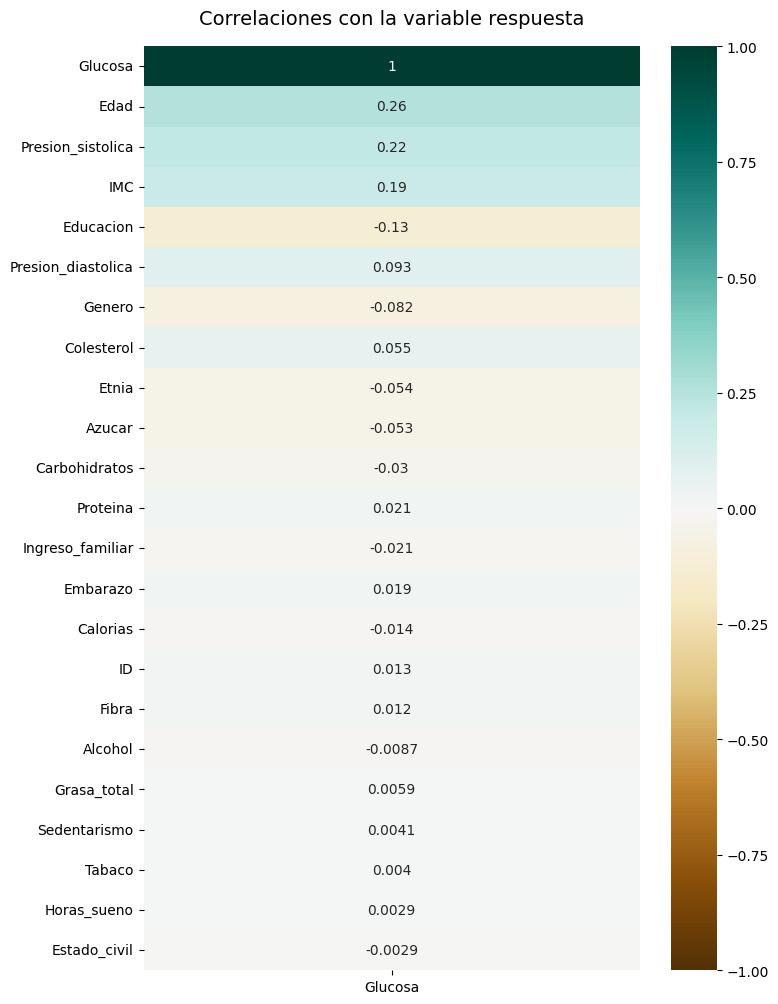

In [456]:
# Crear un DataFrame de las correlaciones
correlation_matrix = df_preseleccion.corr()

# Ordenar las correlaciones por el valor absoluto
correlaciones_ordenadas = correlation_matrix[['Glucosa']].reindex(correlation_matrix[['Glucosa']].abs().sort_values(by='Glucosa', ascending=False).index)

# Figura para el heatmap
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(correlaciones_ordenadas, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlaciones con la variable respuesta', fontdict={'fontsize':14}, pad=16)
plt.show()

Otra técnica sería el método de selección de características de tipo envoltura descrito en la práctica del tema 7.

In [457]:
#pip install mlxtend

In [458]:
X = df_preseleccion.drop(columns=['ID','Glucosa'])  # Todas las características excepto 'Glucosa' y el ID
y = df_preseleccion['Glucosa']                # Variable objetivo

# Crear el regresor
dt = DecisionTreeRegressor(random_state=1234)

# Crear el objeto de validación cruzada
kf = KFold(n_splits=5, shuffle=True, random_state=1234)

# Configurar el selector de características
sbs = SFS(dt, 
          k_features=1, 
          forward=False, 
          floating=False, 
          scoring='r2',  # Usar R^2 como métrica de evaluación
          cv=kf)

# Ajustar el selector de características
sbs = sbs.fit(X, y)


In [459]:
sbs.subsets_

{21: {'feature_idx': (0,
   1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19,
   20),
  'cv_scores': array([-1.34555555, -0.96757851, -1.42229685, -0.73983648, -1.39713166]),
  'avg_score': -1.1744798110653645,
  'feature_names': ('Genero',
   'Edad',
   'Etnia',
   'Educacion',
   'Estado_civil',
   'Embarazo',
   'Ingreso_familiar',
   'IMC',
   'Alcohol',
   'Sedentarismo',
   'Tabaco',
   'Horas_sueno',
   'Calorias',
   'Proteina',
   'Carbohidratos',
   'Azucar',
   'Fibra',
   'Grasa_total',
   'Colesterol',
   'Presion_sistolica',
   'Presion_diastolica')},
 20: {'feature_idx': (0,
   1,
   2,
   3,
   4,
   5,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19,
   20),
  'cv_scores': array([-1.02181651, -1.36842895, -1.20030194, -0.63740659, -1.3326948 ]),
  'avg_score': -1.1121297565774733,
  'feature_names': ('Genero',
   'Edad',
   'Etnia',
   'Educacion',
   'Estado_c

Por último aplicaremos también el método de permutation importance visto en la práctica del tema 7.

In [460]:
from sklearn.inspection import permutation_importance

# Separar los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# Entrenar el modelo base
base_model = DecisionTreeRegressor(random_state=1234)
base_model.fit(X_train, y_train)

# Aplicar permutation importance
r = permutation_importance(base_model, X_test, y_test, n_repeats=5, random_state=1234, scoring='r2')


In [461]:
# Mostrar los resultados
resultados = pd.DataFrame({
    'Característica': X.columns,
    'Importancia_media': r.importances_mean,
    'Importancia_std': r.importances_std
})

print(resultados.sort_values(by='Importancia_media', ascending=False))

        Característica  Importancia_media  Importancia_std
3            Educacion           0.188578         0.107964
1                 Edad           0.172281         0.236303
16               Fibra           0.088783         0.074039
14       Carbohidratos           0.067789         0.125576
6     Ingreso_familiar           0.062167         0.066896
11         Horas_sueno           0.022399         0.024553
12            Calorias           0.015172         0.025047
10              Tabaco           0.000339         0.000463
5             Embarazo          -0.000002         0.000005
4         Estado_civil          -0.001206         0.004859
17         Grasa_total          -0.004005         0.042376
13            Proteina          -0.005567         0.007932
2                Etnia          -0.012777         0.020006
8              Alcohol          -0.019736         0.038039
9         Sedentarismo          -0.060612         0.047882
18          Colesterol          -0.114086         0.0466

Se observa como las características que cada método selecciona son distintas. La tabla siguiente muestra las 10 características más importantes seleccionadas por cada método:

| Técnica                    | Características |
|----------------------------|-----------------|
| **Correlaciones**          | Edad, Presion_sistolica, IMC, Educacion, Presion_diastolica, Genero, Colesterol, Etnia, Azucar, Carbohidratos |
| **SFS** | Genero, Educacion, IMC, Alcohol, Tabaco, Horas_sueno, Calorias, Fibra, Grasa_total, Presion_sistolica |
| **Permutation Importance** | Educacion, Edad, Fibra, Carbohidratos, Ingreso_familiar, Horas_sueno, Calorias, Tabaco, Embarazo, Estado_civil |


Hay 10 características que son seleccionadas por al menos dos de los métodos. Estas son: 
- Educacion
- Edad
- Presion_sistolica
- Fibra
- Calorias
- Horas_sueno
- Tabaco
- Carbohidratos
- Genero
- IMC

Nos quedaremos con estas 10 características.

In [462]:
df = df_preseleccion[['ID', 'Educacion', 'Edad', 'Presion_sistolica', 'Fibra', 'Calorias', 'Horas_sueno', 'Tabaco', 'Carbohidratos', 'Genero', 'IMC', 'Glucosa']].copy()
df.reset_index(drop=True, inplace=True)
df

,ID,Educacion,Edad,Presion_sistolica,Fibra,Calorias,Horas_sueno,Tabaco,Carbohidratos,Genero,IMC,Glucosa
0,73559.0,4.0,72.0,142.000000,10.350000,1845.000000,8.0,2.0,255.430000,1.0,28.9,10.713
1,73561.0,5.0,73.0,137.333333,13.050000,1506.500000,9.0,2.0,187.075000,2.0,19.7,5.940
2,73564.0,5.0,61.0,122.666667,15.700000,2055.500000,9.0,2.0,241.285000,2.0,35.7,6.106
3,73568.0,5.0,26.0,104.666667,39.800000,2510.500000,8.0,2.0,217.870000,2.0,20.3,4.940
4,73574.0,5.0,33.0,121.333333,38.250000,4990.500000,8.0,2.0,561.315000,2.0,22.8,4.663
...,...,...,...,...,...,...,...,...,...,...,...,...
3167,83713.0,4.0,34.0,114.666667,13.900000,1996.000000,5.0,2.0,259.225000,1.0,23.7,5.718
3168,83714.0,4.0,19.0,112.666667,2.350000,1210.000000,7.0,2.0,164.145000,2.0,28.1,4.940
3169,83718.0,3.0,60.0,116.000000,16.527209,2019.095909,4.0,1.0,244.802107,2.0,27.4,4.996
3170,83723.0,2.0,61.0,139.333333,15.700000,1919.500000,6.0,2.0,221.410000,1.0,33.1,8.826


Tenemos 3172 participantes y 10 características.

# **REGRESIÓN**

# 4 Aprendizaje de modelos predictivos

En primer lugar abordaremos el problema como una tarea de **regresión**, donde la variable numérica a predecir es la **concentración de glucosa en sangre**.

**a) División de los datos en conjunto de entrenamiento y prueba**

In [463]:
X = df.drop(columns=['ID', 'Glucosa'])
y = df['Glucosa']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [464]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2537, 10), (635, 10), (2537,), (635,))

**b) Normalización de los datos**

In [465]:
# Instanciar objeto StandardScaler (u otro de los scalers disponibles)
scaler = StandardScaler() #MinMaxScaler() #RobustScaler() #MaxAbsScaler()

# Método fit
scaler.fit(X_train)

# Método transform
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train = X_train_scaled
X_test = X_test_scaled

**c) Primer modelo: Regresión lineal**

In [466]:
# Instanciar el modelo de regresión lineal
linear_model = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento estandarizados
linear_model.fit(X_train, y_train)

LinearRegression()

**d) Segundo modelo: Random Forest Regressor**

In [467]:
# Instanciar el modelo de regresión lineal (con hipérparámetros por defecto)
rf_model = RandomForestRegressor()

# Entrenar el modelo
rf_model.fit(X_train, y_train)

RandomForestRegressor()

# 5 Validación, ajuste (de hiper-parámetros) y evaluación de los distintos modelos candidatos

**a) Regresión lineal**

In [468]:
# Calcular los valores de R^2 en validación cruzada con 4 pliegues
scores = cross_val_score(linear_model, X_train, y_train, scoring='r2', cv=4)

# Mostrar el valor medio y máximo de R^2 de los resultados de la validación cruzada
print('R^2 Medio', ':', np.mean(scores))
print('R^2 Max', ':', np.max(scores))

R^2 Medio : 0.09667735096933269
R^2 Max : 0.12158565003510191


El resultado es bastante pobre. No hay hiperparámetros que ajustar en la regresión lineal. La regresión lineal estándar se basa en la minimización de los errores cuadráticos y no tiene componentes que ajustar. Tendríamos que probar con otros modelos.

Calcularemos el error cuadrático medio y el coeficiente de determinación en el conjunto de entrenamiento y en el conjunto de prueba.

In [469]:
# Predecir los resultados en el conjunto de entrenamiento
linear_predictions_train = linear_model.predict(X_train)

# Predecir los resultados en el conjunto de prueba
linear_predictions_test = linear_model.predict(X_test)

In [470]:
# R^2 del conjunto de entrenamiento
r2_train = np.round(linear_model.score(X_train, y_train), 3)
print(f'R^2 entrenamiento: {r2_train}')

# R^2 del conjunto de prueba
r2_test = np.round(linear_model.score(X_test, y_test), 3)
print(f'R^2 prueba: {r2_test}')

R^2 entrenamiento: 0.107
R^2 prueba: 0.103


In [471]:
# Calcular el error cuadrático medio para el conjunto de entrenamiento
mse_train = np.round(mean_squared_error(y_train, linear_predictions_train), 3)
print(f'MSE entrenamiento: {mse_train}')

# Calcular el error cuadrático medio para el conjunto de prueba
mse_test = np.round(mean_squared_error(y_test, linear_predictions_test), 3)
print(f'MSE prueba: {mse_test}')

MSE entrenamiento: 2.788
MSE prueba: 2.992


**b) Random Forest Regressor**

In [472]:
# Calcular los valores de R^2 en validación cruzada con 4 pliegues
scores = cross_val_score(rf_model, X_train, y_train, scoring='r2', cv=4)

# Mostrar el valor medio y máximo de R^2 de los resultados de la validación cruzada
print('R^2 Medio', ':', np.mean(scores))
print('R^2 Max', ':', np.max(scores))

R^2 Medio : 0.012245789596580237
R^2 Max : 0.06554144774831228


También se obtiene un resultado pobre. Vamos a ajustar los hiperparámetros mediante una búsqueda grid con validación cruzada.

In [480]:
# Instanciar el modelo de Random Forest Regressor
rf_model = RandomForestRegressor()

# Definir el conjunto de hiperparámetros a explorar
param_grid = {
    'n_estimators': [20, 100],          # Número de árboles en el bosque
    'max_features': ['sqrt', 'log2'],        # Número de características a considerar en cada split
    'max_depth': [4, 6, 8],                  # Profundidad máxima del árbol
    'min_samples_split': [2, 5, 10],         # Número mínimo de muestras requeridas para dividir un nodo
    'min_samples_leaf': [2, 4],           # Número mínimo de muestras necesarias en una hoja
    'bootstrap': [True, False]               # Si se usa bootstrap para muestrear los datos
}

# Instanciar GridSearchCV
rf_grid = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='r2')

# Ajustar el modelo
rf_grid.fit(X_train, y_train)

# Obtener los mejores parámetros encontrados
print("Best parameters found: ")
print(rf_grid.best_estimator_)
print(rf_grid.best_params_)
print(f"Mejor R2: {rf_grid.best_score_:.2f}")


Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best parameters found: 
RandomForestRegressor(max_depth=6, max_features='log2', min_samples_leaf=4,
                      min_samples_split=10)
{'bootstrap': True, 'max_depth': 6, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Mejor R2: 0.11


El mejor modelo obtenido alcanza un coeficiente de determinación de 0.11, lo cuál sigue sin ser mucho. Veamos el rendimiento en el conjunto de prueba.

In [481]:
rf_model = RandomForestRegressor(**rf_grid.best_params_)
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=6, max_features='log2', min_samples_leaf=4,
                      min_samples_split=10)

In [482]:
# Predicción en el conjunto de prueba
rf_tree_y_pred = rf_model.predict(X_test)

# Error cuadrático medio del modelo
print("MSE: %.4f" % mean_squared_error(y_test, rf_tree_y_pred))

# Coeficiente de determinación R^2
print("R^2: %.4f" % r2_score(y_true=y_test, y_pred=rf_tree_y_pred))

MSE: 3.0581
R^2: 0.0836


El modelo Random Forest Regressor no ha mejorado el rendimiento de la Regresión Lineal. 

En nuestro problema sobre la diabetes, quizás querer predecir la glucosa en sangre a partir de las características seleccionadas no sea la mejor aproximación. Quizás sería mejor abordar el problema como una tarea de clasificación, donde se predice si un paciente tiene diabetes o no.

# **CLASIFICACIÓN**

# 4 Aprendizaje de modelos predictivos

Ahora abordaremos el problema como una tarea de **clasificación**, donde la variable binaria a predecir es si la persona padece **diabetes**.

La diabetes se define como una glucosa en sangre en ayunas mayor a 7 mmol/l. Por tanto, vamos a crear una nueva variable binaria que tome el valor 1 si la glucosa en sangre es mayor de 7 mmol/l y 0 en caso contrario. Fuente: https://doi.org/10.2337/diacare.21.9.1408

In [383]:
# Convertir y en variable binaria
df['Glucosa_binaria'] = (df['Glucosa'] >= 7).astype(int)

**a) División de los datos en conjunto de entrenamiento y prueba**

In [ ]:
X = df.drop(columns=['ID', 'Glucosa', 'Glucosa_binaria'])
y = df['Glucosa_binaria']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [384]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2537, 10), (635, 10), (2537,), (635,))

**b) Balanceo de clases**

In [385]:
y_test.value_counts(normalize=True)

Glucosa_binaria
0    0.902362
1    0.097638
Name: proportion, dtype: float64

Tenemos una base de datos muy desbalanceada. Más del 90% de los participantes no tienen diabetes. Por tanto, vamos a utilizar la técnica de sobremuestreo SMOTE para equilibrar la base de datos.

In [386]:
# Aplicar SMOTE al conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Distribución de clases antes de SMOTE:")
print(y_train.value_counts())

print("\nDistribución de clases después de SMOTE:")
print(y_train_smote.value_counts())

Distribución de clases antes de SMOTE:
Glucosa_binaria
0    2289
1     248
Name: count, dtype: int64

Distribución de clases después de SMOTE:
Glucosa_binaria
0    2289
1    2289
Name: count, dtype: int64


In [387]:
X_train = X_train_smote
y_train = y_train_smote

**a) Árbol de decisión**

In [388]:
estimator = DecisionTreeClassifier()

# Espacio de búsqueda de hiperparámetros
parameters={'max_depth': [4,6,8,10,12],
           'criterion': ['gini','entropy'],
           'splitter': ['best','random'],
           'min_weight_fraction_leaf': [0.0,0.1,0.2,0.3],
           'min_impurity_decrease': [0.0,0.05,0.1,0.2]}

# Crear el objeto GridSearchCV
model_dt = GridSearchCV(estimator=estimator,
                     param_grid=parameters,
                     cv=KFold(n_splits=10, shuffle=True, random_state=42),
                     verbose=1,
                     n_jobs=-1,
                     refit=True,
                     scoring='roc_auc')# Como métrica de evaluación se usa el área bajo la curva ROC, ya que esta métrica no depende del umbral de clasificación

# Ajustar el modelo
model_dt.fit(X_train, y_train)

# Obtener los mejores parámetros encontrados
print("Best parameters found: ")
print(model_dt.best_estimator_)
print(model_dt.best_params_)
print(f"Best roc_auc: %.1f%%"% (model_dt.best_score_*100.0))

Fitting 10 folds for each of 320 candidates, totalling 3200 fits
Best parameters found: 
DecisionTreeClassifier(criterion='entropy', max_depth=8)
{'criterion': 'entropy', 'max_depth': 8, 'min_impurity_decrease': 0.0, 'min_weight_fraction_leaf': 0.0, 'splitter': 'best'}
Best roc_auc: 93.4%


**b)Random Forest Classifier**

In [408]:
estimator = RandomForestClassifier()

# Espacio de búsqueda de hiperparámetros
parameters = {
    'n_estimators': [5, 10, 20],  
    'max_depth': [3, 4, 5],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],  
    'bootstrap': [True, False],  
    'criterion': ['gini', 'entropy']  
}

# Crear el objeto GridSearchCV
model_rf = GridSearchCV(estimator=estimator,
                     param_grid=parameters,
                     cv=KFold(n_splits=10, shuffle=True, random_state=42),
                     verbose=1,
                     scoring='roc_auc',
                     n_jobs=-1,  # Use all available cores
                     refit=True)  # Refit the model with the best parameters found

# Ajustar el modelo
model_rf.fit(X_train, y_train)

# Obtener los mejores parámetros encontrados
print("Best parameters found: ")
print(model_rf.best_estimator_)
print(model_rf.best_params_)
print(f"Best roc_auc: %.1f%%"% (model_rf.best_score_*100.0))

Fitting 10 folds for each of 324 candidates, totalling 3240 fits
Best parameters found: 
RandomForestClassifier(criterion='entropy', max_depth=5, min_samples_split=10,
                       n_estimators=20)
{'bootstrap': True, 'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 20}
Best roc_auc: 94.4%


**c) Logistic regression**

In [392]:
estimator = LogisticRegression()

# Definir el grid de hiperparámetros
parameters = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [0.1, 1.0, 10.0],
    'solver': ['liblinear', 'saga'],  # Solvers compatibles con 'l1', 'elasticnet'
    'max_iter': [100, 500],
    'l1_ratio': np.linspace(0, 1, 5)  # Si se usa 'elasticnet'
}

# Crear el objeto RandomizedSearchCV
model_lr = RandomizedSearchCV(estimator=estimator,
                              param_distributions=parameters,
                              cv=KFold(n_splits=10, shuffle=True, random_state=42),
                              verbose=1,
                              scoring='roc_auc',  
                              n_jobs=-1,
                              refit=True,
                              n_iter=50) 

# Ajustar el modelo
model_lr.fit(X_train, y_train)

# Obtener los parámetros del mejor modelo
print("Best parameters found: ")
print(model_lr.best_estimator_)
print(model_lr.best_params_)
print(f"Best roc_auc: %.1f%%" % (model_lr.best_score_ * 100.0))


Fitting 10 folds for each of 50 candidates, totalling 500 fits


c:\Users\Horacio\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
50 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Horacio\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Horacio\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Horac

Best parameters found: 
LogisticRegression(C=10.0, l1_ratio=0.75, max_iter=500, penalty='l1',
                   solver='liblinear')
{'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 500, 'l1_ratio': 0.75, 'C': 10.0}
Best roc_auc: 79.1%


El warning indica que alguna de las combinaciones de hiperparámetros escogida no es válida. Se ignorará este warning.

**d) Naïve Bayes**

In [395]:
estimator = GaussianNB()

# Espacio de búsqueda de hiperparámetros
parameters = {
    'var_smoothing': np.logspace(0,-9, num=100)  # Using a log scale for var_smoothing for a wider search range
}

# Objeto GridSearchCV
model_nb = GridSearchCV(estimator=estimator,
                        param_grid=parameters,
                        cv=KFold(n_splits=5, shuffle=True, random_state=42),  # Reduce to 5 folds
                        verbose=1,
                        scoring='roc_auc',
                        n_jobs=-1,
                        refit=True) 

# Ajustar el modelo
model_nb.fit(X_train, y_train)

# Obtener los mejores parámetros encontrados
print("Best parameters found: ")
print(model_nb.best_estimator_)
print(model_nb.best_params_)
print(f"Best roc_auc: %.1f%%" % (model_nb.best_score_ * 100.0))


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters found: 
GaussianNB()
{'var_smoothing': 1e-09}
Best roc_auc: 81.5%


De todos los modelos, el que mejor rendimiento ha obtenido ha sido el Random Forest Classifier, por lo que este será el modelo seleccionado para la clasificación de la diabetes.

# 6 Evaluación final del modelo finalmente seleccionado y presentación de resultados

                      TRAIN                       
              precision    recall  f1-score   support

           0       0.91      0.83      0.86      2289
           1       0.84      0.92      0.88      2289

    accuracy                           0.87      4578
   macro avg       0.87      0.87      0.87      4578
weighted avg       0.87      0.87      0.87      4578



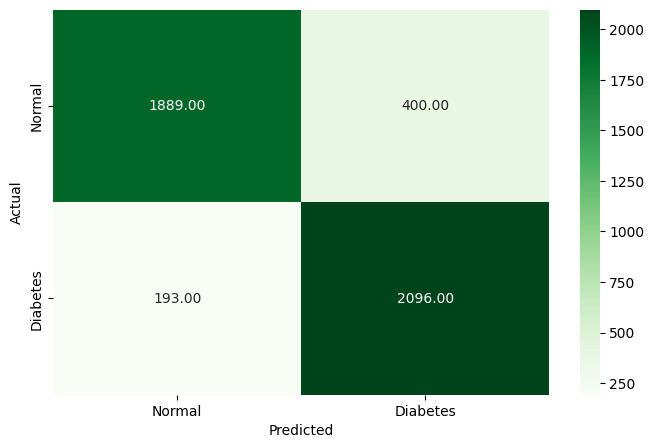

                       TEST                       
              precision    recall  f1-score   support

           0       0.94      0.80      0.86       573
           1       0.23      0.56      0.33        62

    accuracy                           0.77       635
   macro avg       0.59      0.68      0.60       635
weighted avg       0.87      0.77      0.81       635



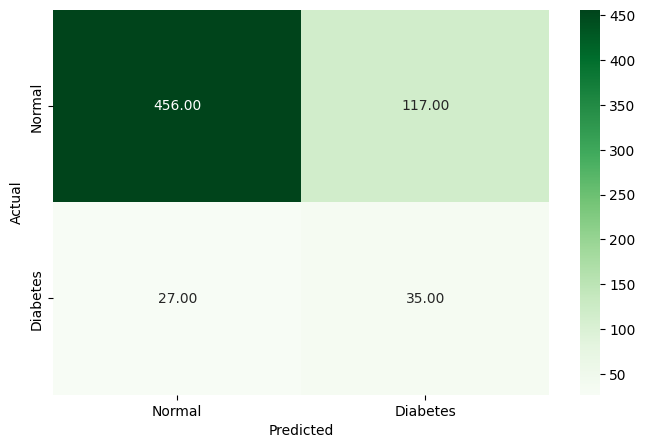

In [409]:
model =  RandomForestClassifier(**model_rf.best_params_)
model.fit(X_train, y_train)
 
# c) Evaluate the model: Print classification report and confusion matrix for train and test
print("TRAIN".center(50))
train_classification_report = metrics_score(y_train, model.predict(X_train))
print("TEST".center(50))
test_classification_report = metrics_score(y_test, model.predict(X_test))

Como podemos observar, el modelo tiene una alta precisión para predecir si un paciente NO tiene diabetes, pero no es tan bueno para predecir si un paciente SÍ tiene diabetes. Esto se debe probablemente a que la base de datos está muy desbalanceada. Necesitaríamos más datos de pacientes con diabetes para mejorar el rendimiento del modelo, o utilizar técnicas de sobremuestreo más avanzadas. Aún así, es importante tener en cuenta que la diabetes es una enfermedad compleja y multifactorial, que depende de muchas variables que aquí no se han considerado, como la herencia genética, por lo que pretender predecirla con precisión a partir de unas pocas características puede ser un reto no muy realista. A pesar de ello, los modelos que hemos creado pueden ser útiles para entender mejor qué factores están asociadas a una mayor probabilidad de padecer diabetes. Para ello, exploraremos a continuación las características más importantes, tanto para el mejor modelo de regresión (regresión lineal) como para el mejor modelo de clasificación (random forest).

# 7 Explicabilidad de los modelos

**a) Regresión lineal**

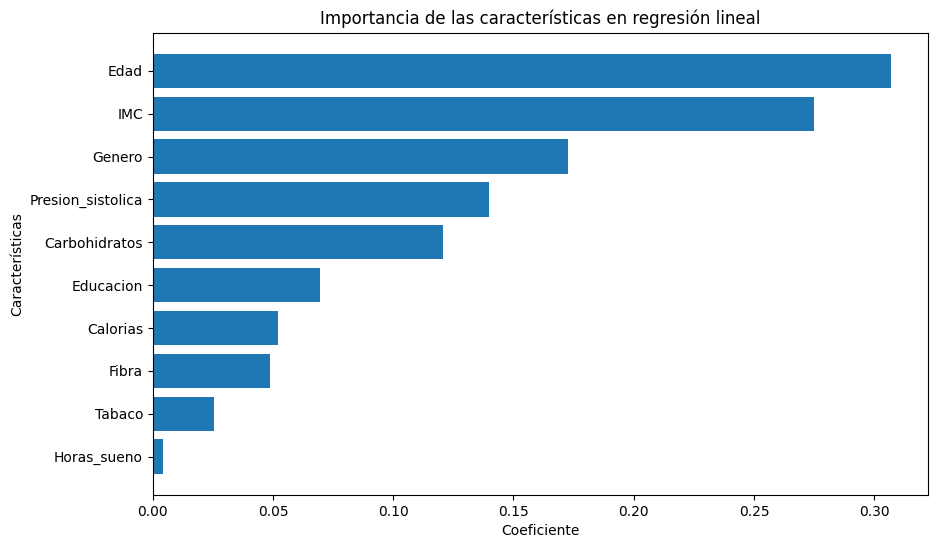

In [416]:
caracteristicas = X.columns

# Inicializar un DataFrame para almacenar los coeficientes
coefs = pd.DataFrame(index=caracteristicas)

# Extraer los coeficientes del modelo lineal y almacenarlos en el DataFrame
coefs["coef"] = linear_model.coef_

# Ordenar por el valor absoluto de los coeficientes en orden descendiente
coefs['abs_coef'] = coefs['coef'].abs()
coefs_sorted = coefs.sort_values(by='abs_coef', ascending=False)

# Visualizar los coeficientes
plt.figure(figsize=(10, 6))
plt.barh(coefs_sorted.index, coefs_sorted['abs_coef'])
plt.xlabel('Coeficiente')
plt.ylabel('Características')
plt.title('Importancia de las características en regresión lineal')
plt.gca().invert_yaxis()  # Para que las características con coeficientes más grandes aparezcan arriba
plt.show()


**b) Random Forest Classifier**

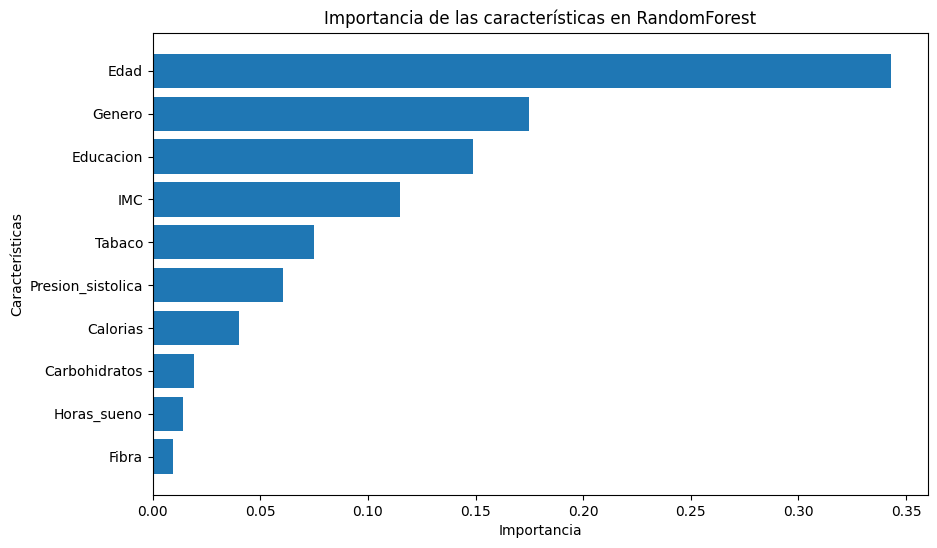

In [410]:
# Obtener la importancia de las características
feature_importances = model.feature_importances_

# Crear un DataFrame para facilitar la visualización
features = X_train.columns if isinstance(X_train, pd.DataFrame) else np.arange(X_train.shape[1])
importances_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

# Ordenar las características por importancia
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Visualizar la importancia de las características
plt.figure(figsize=(10, 6))
plt.barh(importances_df['Feature'], importances_df['Importance'])
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.title('Importancia de las características en RandomForest')
plt.gca().invert_yaxis()  # Para que las características más importantes aparezcan arriba
plt.show()

Estas gráficas nos permiten entender qué características son más importantes para el diagnóstico de la diabetes. Vemos que en ambos modelos la edad y el género están entre las características más relevantes. No obstante, estos son factores no modificables. En cambio, el IMC (Índice de Masa Corporal) aparece en ambos modelos como una de las características más importantes, lo que sugiere que mantener un peso saludable puede ser una estrategia eficaz para prevenir la diabetes. Factores como el consumo de fibra y las horas de sueño aparecen en ambos modelos entre las características menos relevantes. Aunque correlación no implica causalidad, una interpretación práctica de estos resultados podría ser que, aunque mejorar el sueño o aumentar el consumo de fibra tiene un impacto positivo en la diabetes, probablemente tenga un efecto es menor que reducir el IMC. Por lo que una intervención para prevenir la diabetes quizás debería priorizar la pérdida de peso frente a otras variables.

Hemos consultado la literatura científica para verificar si nuestros resultados son consistentes con lo que se sabe sobre la diabetes, y hemos encontrado que efectivamente un IMC elevado es uno de los factores principales de riesgo para la diabetes:
- https://doi.org/10.2337/dc22-1042
- https://doi.org/10.1007/s10654-009-9405-0